## 🚩뇌졸증 데이터 및 예측

컬럼 설명
- sex : 1: male, 0 : female
- age : patient's age
- hypertension : patient has ever had hypertension
- heart_disease : patient has ever had heart_disease
- ever_married : patient married
- work_type :
>Never_worked: 0  
>children: 1  
>Govt_job: 2  
>Self-employed : 3  
>Private : 4
- Residence_type : patient area 1: Urban, 0: Rural
- avg_glucose_level : patient average blood sugar level
- bmi : Body Mass Index
- smoking_status : 1: smokes, 0 : never_smoked
- stroke : target

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./datasets/stroke_data.csv')
df

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
40905,1.0,38.0,0,0,0,4,1,120.94,29.7,1,0
40906,0.0,53.0,0,0,1,4,0,77.66,40.8,0,0
40907,1.0,32.0,0,0,1,2,0,231.95,33.2,0,0
40908,1.0,42.0,0,0,1,3,0,216.38,34.5,0,0


In [2]:
df['stroke'].value_counts()

stroke
1    20460
0    20450
Name: count, dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


In [4]:
df.duplicated().sum()

0

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,40907.0,0.555162,0.496954,0.00,0.00,1.00,1.00,1.00
age,40910.0,51.327255,21.623969,-9.00,35.00,52.00,68.00,103.00
hypertension,40910.0,0.213835,0.410017,0.00,0.00,0.00,0.00,1.00
heart_disease,40910.0,0.127719,0.333781,0.00,0.00,0.00,0.00,1.00
ever_married,40910.0,0.821340,0.383072,0.00,1.00,1.00,1.00,1.00
work_type,40910.0,3.461134,0.780919,0.00,3.00,4.00,4.00,4.00
Residence_type,40910.0,0.514886,0.499784,0.00,0.00,1.00,1.00,1.00
avg_glucose_level,40910.0,122.075901,57.561531,55.12,78.75,97.92,167.59,271.74
bmi,40910.0,30.406355,6.835072,11.50,25.90,29.40,34.10,92.00
smoking_status,40910.0,0.488609,0.499876,0.00,0.00,0.00,1.00,1.00


### 데이터 탐색 및 시각화

In [6]:
yes_df = df[df['stroke']==1]
no_df = df[df['stroke']==0]

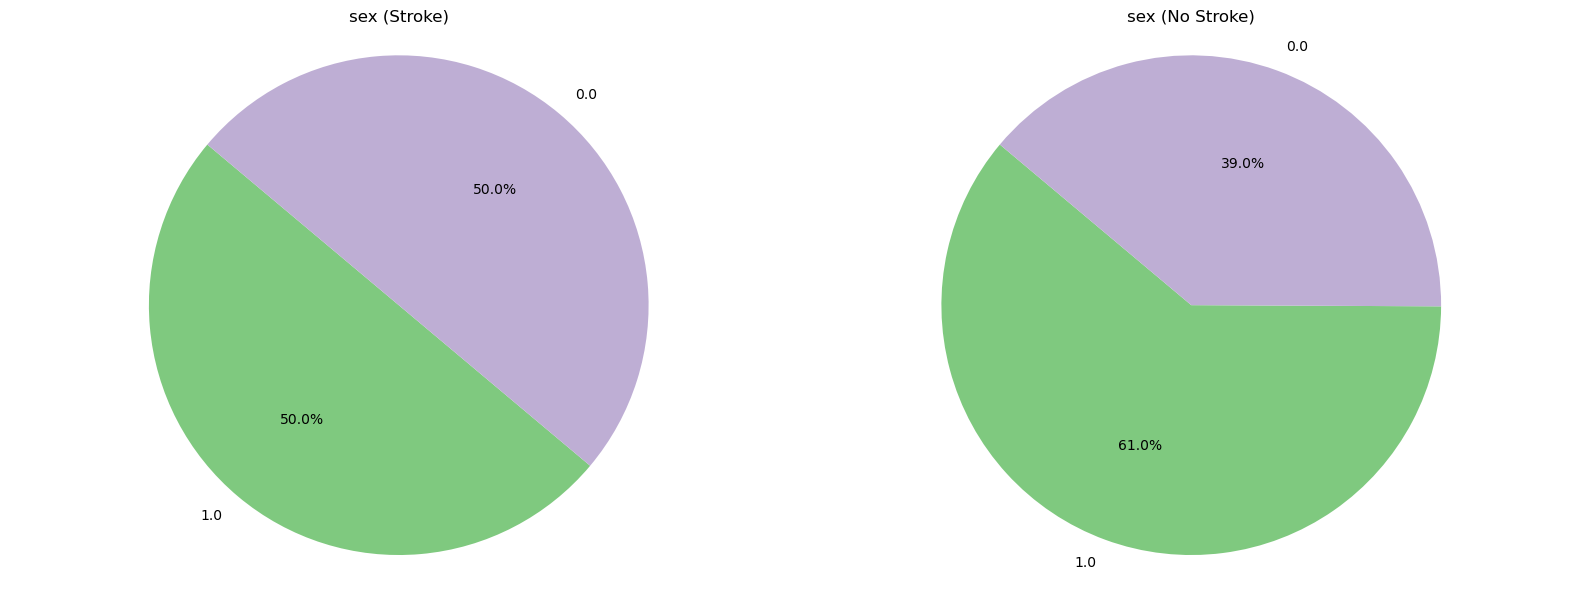

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(16, 6))

yes_df_sex_counts = yes_df['sex'].value_counts()
no_df_sex_counts = no_df['sex'].value_counts()

axes[0].pie(yes_df_sex_counts, labels=yes_df_sex_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Accent'), startangle=140)
axes[0].set_title('sex (Stroke)')
axes[0].axis('equal')  

axes[1].pie(no_df_sex_counts, labels=no_df_sex_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Accent'), startangle=140)
axes[1].set_title('sex (No Stroke)')
axes[1].axis('equal')  


plt.tight_layout()
plt.show()

뇌졸증인 환자의 성별 비율은 동일했고, 정상인 사람의 성별 비율은 남자가 10프로 가량 더 많은 것을 알 수 있었다.

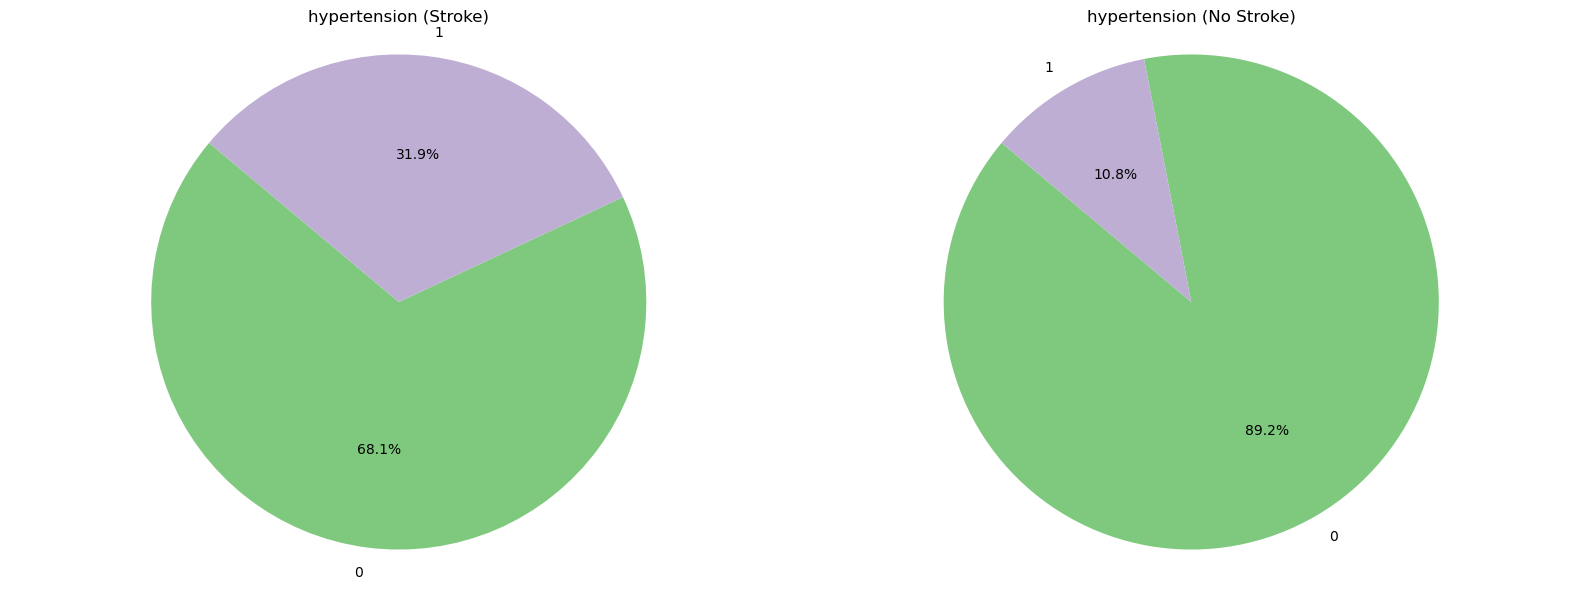

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(16, 6))

yes_df_sex_counts = yes_df['hypertension'].value_counts()
no_df_sex_counts = no_df['hypertension'].value_counts()

axes[0].pie(yes_df_sex_counts, labels=yes_df_sex_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Accent'), startangle=140)
axes[0].set_title('hypertension (Stroke)')
axes[0].axis('equal')  

axes[1].pie(no_df_sex_counts, labels=no_df_sex_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Accent'), startangle=140)
axes[1].set_title('hypertension (No Stroke)')
axes[1].axis('equal')  


plt.tight_layout()
plt.show()

뇌졸증이 있는 환자에서 고혈압이 있는 환자의 비율이 정상인 사람의 수보다 약 20프로 가량 많았다.

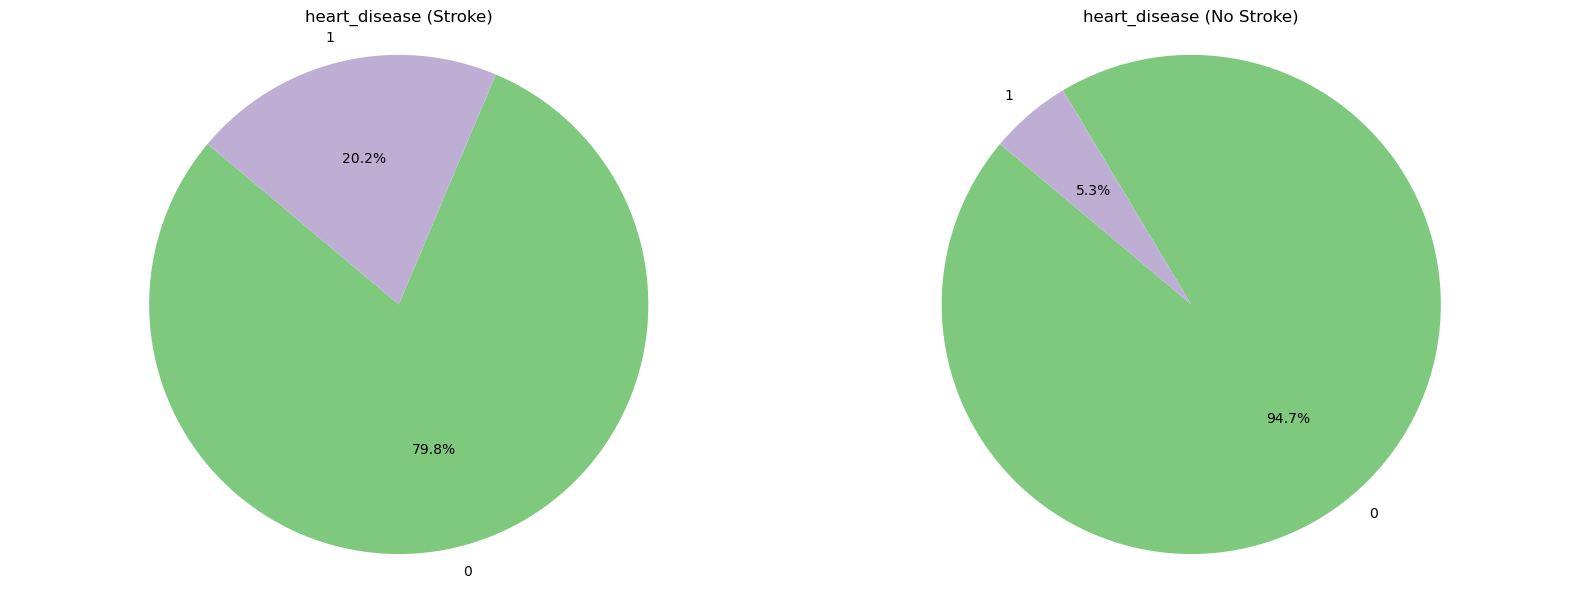

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(16, 6))

yes_df_sex_counts = yes_df['heart_disease'].value_counts()
no_df_sex_counts = no_df['heart_disease'].value_counts()

axes[0].pie(yes_df_sex_counts, labels=yes_df_sex_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Accent'), startangle=140)
axes[0].set_title('heart_disease (Stroke)')
axes[0].axis('equal')  

axes[1].pie(no_df_sex_counts, labels=no_df_sex_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Accent'), startangle=140)
axes[1].set_title('heart_disease (No Stroke)')
axes[1].axis('equal')  


plt.tight_layout()
plt.show()

뇌졸증 환자들 중 심장병이 있는 비율 또한 정상인 사람들보다 약 14프로 가량 더 많았다.

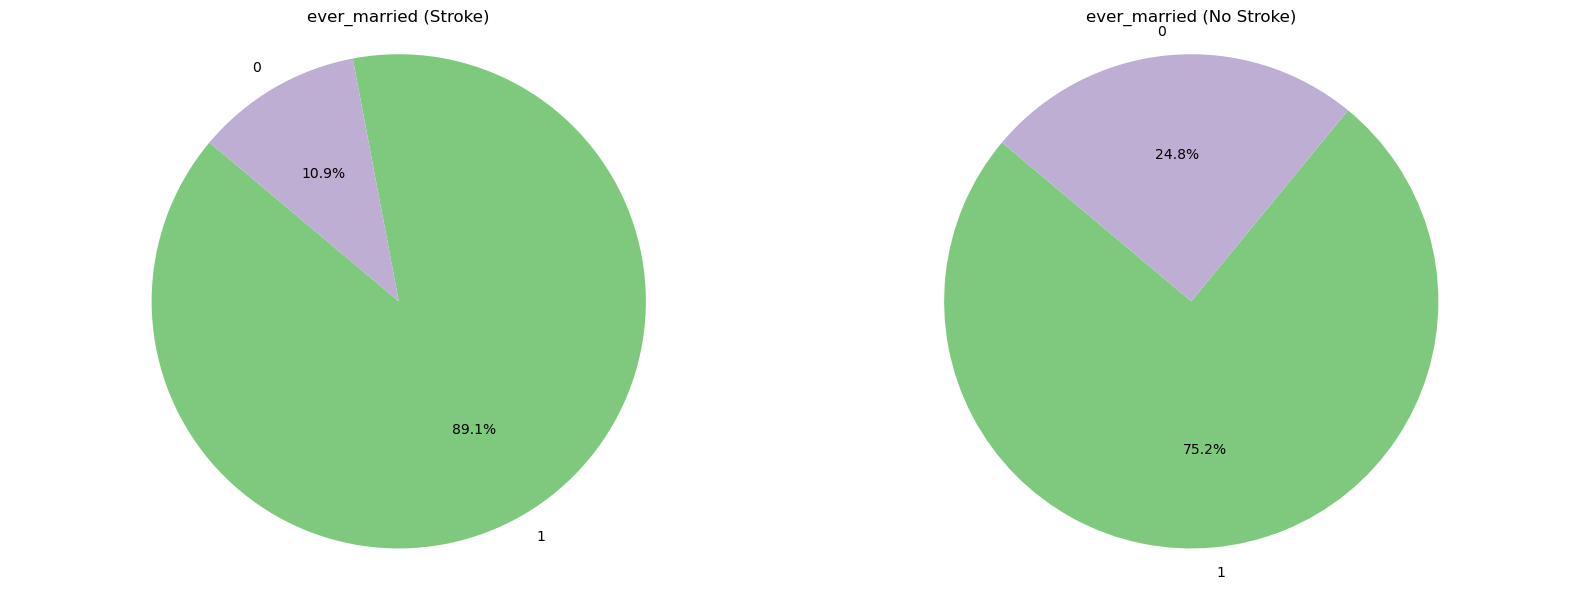

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(16, 6))

yes_df_sex_counts = yes_df['ever_married'].value_counts()
no_df_sex_counts = no_df['ever_married'].value_counts()

axes[0].pie(yes_df_sex_counts, labels=yes_df_sex_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Accent'), startangle=140)
axes[0].set_title('ever_married (Stroke)')
axes[0].axis('equal')  

axes[1].pie(no_df_sex_counts, labels=no_df_sex_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Accent'), startangle=140)
axes[1].set_title('ever_married (No Stroke)')
axes[1].axis('equal')  


plt.tight_layout()
plt.show()

혼인 유무에 대해서는 정상인 사람이 한 번 이상 결혼한 비율이 약 14프로 정도 더 많았다.

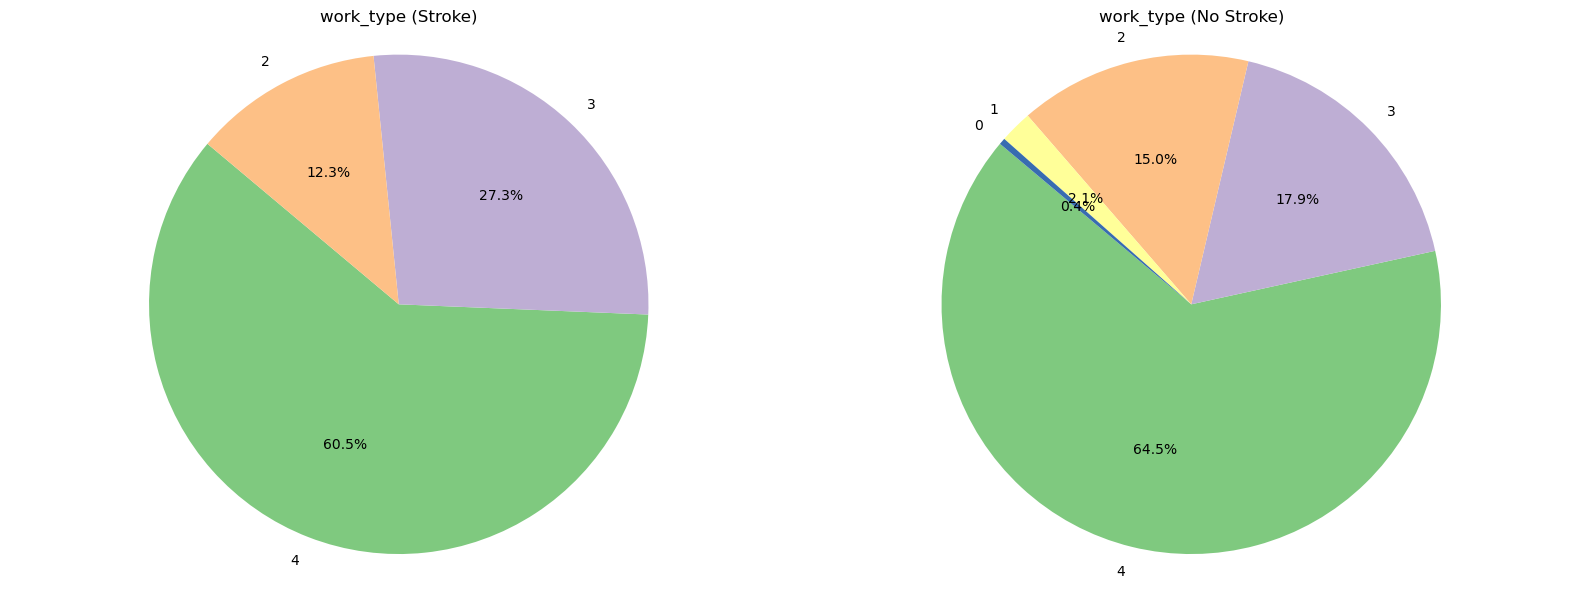

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(16, 6))

yes_df_sex_counts = yes_df['work_type'].value_counts()
no_df_sex_counts = no_df['work_type'].value_counts()

axes[0].pie(yes_df_sex_counts, labels=yes_df_sex_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Accent'), startangle=140)
axes[0].set_title('work_type (Stroke)')
axes[0].axis('equal')  

axes[1].pie(no_df_sex_counts, labels=no_df_sex_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Accent'), startangle=140)
axes[1].set_title('work_type (No Stroke)')
axes[1].axis('equal')  


plt.tight_layout()
plt.show()

>Never_worked: 0 (일한 적 없음)    
>children: 1 (어린이)   
>Govt_job: 2 (공무원)   
>Self-employed : 3 (자영업자)   
>Private : 4 (회사원)

뇌졸증이 있는 환자의 경우, 회사원의 비율이 57.3%, 자영업자가 29.5%, 공무원이 13.2%인 반면,  
정상인 사람들은 회사원의 비율이 64.7%, 자영업자가 17.8%, 공무원이 15%, 나머지 어린이와 일한적 없는 비율이 2.4%이다.

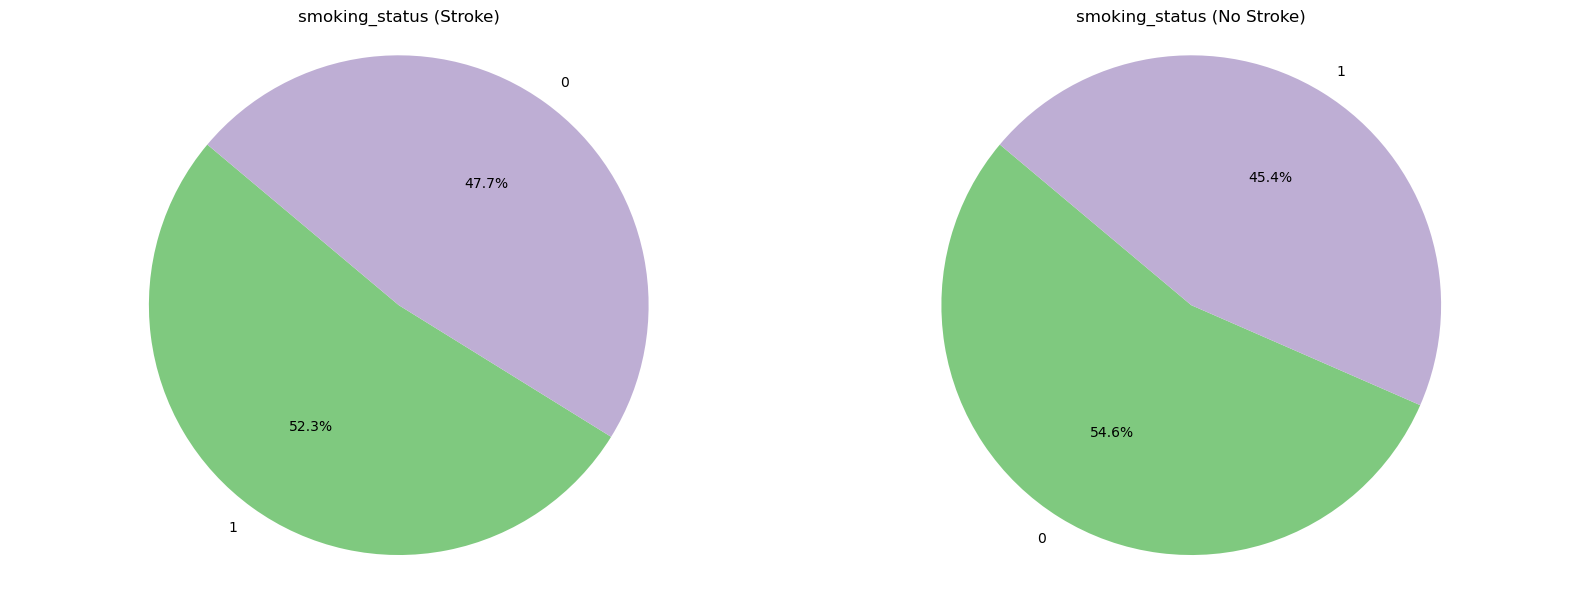

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(16, 6))

yes_df_sex_counts = yes_df['smoking_status'].value_counts()
no_df_sex_counts = no_df['smoking_status'].value_counts()

axes[0].pie(yes_df_sex_counts, labels=yes_df_sex_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Accent'), startangle=140)
axes[0].set_title('smoking_status (Stroke)')
axes[0].axis('equal')  

axes[1].pie(no_df_sex_counts, labels=no_df_sex_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Accent'), startangle=140)
axes[1].set_title('smoking_status (No Stroke)')
axes[1].axis('equal')  


plt.tight_layout()
plt.show()

뇌졸증이 있는 사람과 정상인 사람 모두 흡연과 비흡연자의 비율은 비슷하게 나타남을 알 수 있었다.

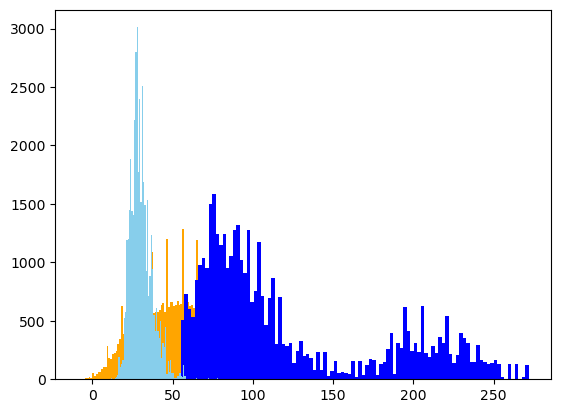

In [13]:
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=100, color="orange")
plt.hist(df['avg_glucose_level'], bins=100, color="blue")
plt.hist(df['bmi'], bins=100, color="skyblue")
plt.show()


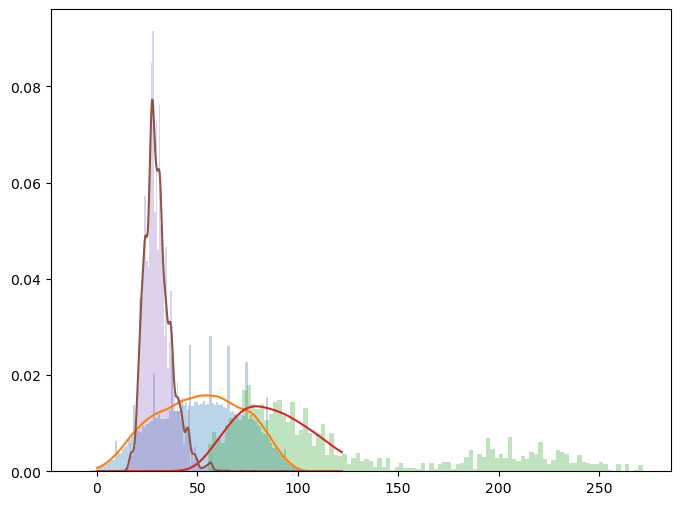

In [14]:
from scipy import stats
import numpy as np

kde = stats.gaussian_kde(df['age'])
line = np.linspace(0, 122, 768, endpoint=True)

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df['age'], density=True, bins=100, alpha=0.3)
ax.plot(line, kde(line))

kde = stats.gaussian_kde(df['avg_glucose_level'])
xx = np.linspace(0, 122, 768, endpoint=True)
ax.hist(df['avg_glucose_level'], density=True, bins=100, alpha=0.3)
ax.plot(line, kde(line))

kde = stats.gaussian_kde(df['bmi'])
xx = np.linspace(0, 122, 768, endpoint=True)
ax.hist(df['bmi'], density=True, bins=100, alpha=0.3)
ax.plot(line, kde(line))
plt.show()


In [15]:
import numpy as np

zero_features = ['age', 'avg_glucose_level', 'bmi']

total_count = df.shape[0]

for feature in zero_features:
    zero_count = df[df[feature] == 0][feature].count()
    print(f'{feature}: {zero_count}건, {np.round(zero_count / total_count * 100, 4)}%')

age: 23건, 0.0562%
avg_glucose_level: 0건, 0.0%
bmi: 0건, 0.0%


나이에서 이상치 확인

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,40907.0,0.555162,0.496954,0.00,0.00,1.00,1.00,1.00
age,40910.0,51.327255,21.623969,-9.00,35.00,52.00,68.00,103.00
hypertension,40910.0,0.213835,0.410017,0.00,0.00,0.00,0.00,1.00
heart_disease,40910.0,0.127719,0.333781,0.00,0.00,0.00,0.00,1.00
ever_married,40910.0,0.821340,0.383072,0.00,1.00,1.00,1.00,1.00
work_type,40910.0,3.461134,0.780919,0.00,3.00,4.00,4.00,4.00
Residence_type,40910.0,0.514886,0.499784,0.00,0.00,1.00,1.00,1.00
avg_glucose_level,40910.0,122.075901,57.561531,55.12,78.75,97.92,167.59,271.74
bmi,40910.0,30.406355,6.835072,11.50,25.90,29.40,34.10,92.00
smoking_status,40910.0,0.488609,0.499876,0.00,0.00,0.00,1.00,1.00


평균값으로 대체

In [17]:
df.loc[df['age'] <= 0, 'age'] = np.nan

In [18]:
mean=df['age'].mean()
df['age'].fillna(mean, inplace=True)
df

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
40905,1.0,38.0,0,0,0,4,1,120.94,29.7,1,0
40906,0.0,53.0,0,0,1,4,0,77.66,40.8,0,0
40907,1.0,32.0,0,0,1,2,0,231.95,33.2,0,0
40908,1.0,42.0,0,0,1,3,0,216.38,34.5,0,0


In [19]:
df[df['age']<=0]

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [20]:
new_df = df.loc[:,'avg_glucose_level'].reset_index()

In [21]:
new_df

,index,avg_glucose_level
0,0,228.69
1,1,105.92
2,2,171.23
3,3,174.12
4,4,186.21
...,...,...
40905,40905,120.94
40906,40906,77.66
40907,40907,231.95
40908,40908,216.38


In [22]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_glu = std.fit_transform(new_df[['avg_glucose_level']])
std_glu

array([[ 1.85219886],
       [-0.28067527],
       [ 0.85395053],
       ...,
       [ 1.9088346 ],
       [ 1.63833814],
       [-0.47021389]])

In [23]:
new_df['avg_glucose_level'] = std_glu
new_df

,index,avg_glucose_level
0,0,1.852199
1,1,-0.280675
2,2,0.853951
3,3,0.904158
4,4,1.114197
...,...,...
40905,40905,-0.019734
40906,40906,-0.771634
40907,40907,1.908835
40908,40908,1.638338


In [24]:
cond1 = new_df['avg_glucose_level'] >= -1.96
cond2 = new_df['avg_glucose_level'] <= 1.96
cond = cond1 & cond2

In [25]:
new_df[cond]

,index,avg_glucose_level
0,0,1.852199
1,1,-0.280675
2,2,0.853951
3,3,0.904158
4,4,1.114197
...,...,...
40905,40905,-0.019734
40906,40906,-0.771634
40907,40907,1.908835
40908,40908,1.638338


In [26]:
df = df.iloc[new_df[cond].index].reset_index(drop=True)
df

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
38999,1.0,38.0,0,0,0,4,1,120.94,29.7,1,0
39000,0.0,53.0,0,0,1,4,0,77.66,40.8,0,0
39001,1.0,32.0,0,0,1,2,0,231.95,33.2,0,0
39002,1.0,42.0,0,0,1,3,0,216.38,34.5,0,0


In [27]:
bmi_df = df.loc[:,'bmi'].reset_index()
bmi_df

,index,bmi
0,0,36.6
1,1,32.5
2,2,34.4
3,3,24.0
4,4,29.0
...,...,...
38999,38999,29.7
39000,39000,40.8
39001,39001,33.2
39002,39002,34.5


In [28]:
std = StandardScaler()
std_bmi = std.fit_transform(bmi_df[['bmi']])
std_bmi

array([[ 0.91855326],
       [ 0.32185858],
       [ 0.59837563],
       ...,
       [ 0.42373328],
       [ 0.61292916],
       [-0.33305022]])

In [29]:
bmi_df['bmi'] = std_bmi
bmi_df

,index,bmi
0,0,0.918553
1,1,0.321859
2,2,0.598376
3,3,-0.915191
4,4,-0.187515
...,...,...
38999,38999,-0.085640
39000,39000,1.529801
39001,39001,0.423733
39002,39002,0.612929


In [30]:
cond1 = bmi_df['bmi'] >= -1.96
cond2 = bmi_df['bmi'] <= 1.96
cond = cond1 & cond2

In [31]:
bmi_df[cond]

,index,bmi
0,0,0.918553
1,1,0.321859
2,2,0.598376
3,3,-0.915191
4,4,-0.187515
...,...,...
38999,38999,-0.085640
39000,39000,1.529801
39001,39001,0.423733
39002,39002,0.612929


In [32]:
df = df.iloc[bmi_df[cond].index].reset_index(drop=True)
df

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
37100,1.0,38.0,0,0,0,4,1,120.94,29.7,1,0
37101,0.0,53.0,0,0,1,4,0,77.66,40.8,0,0
37102,1.0,32.0,0,0,1,2,0,231.95,33.2,0,0
37103,1.0,42.0,0,0,1,3,0,216.38,34.5,0,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37105 entries, 0 to 37104
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                37102 non-null  float64
 1   age                37105 non-null  float64
 2   hypertension       37105 non-null  int64  
 3   heart_disease      37105 non-null  int64  
 4   ever_married       37105 non-null  int64  
 5   work_type          37105 non-null  int64  
 6   Residence_type     37105 non-null  int64  
 7   avg_glucose_level  37105 non-null  float64
 8   bmi                37105 non-null  float64
 9   smoking_status     37105 non-null  int64  
 10  stroke             37105 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.1 MB


In [34]:
df.sex.isna().sum()

3

In [35]:
df['sex'].fillna(1, inplace=True)
df.sex.isna().sum()

0

### 하이퍼 파라미터 확인하기 전, graphviz로 결정트리 시각화

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

features, targets = df.iloc[:, :-1], df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features,targets, test_size=0.2, random_state= 124)

dtc.fit(X_train.values, y_train.values)

DecisionTreeClassifier()

In [37]:
df.columns

Index(['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [38]:
class_names = targets.unique().astype(str)
class_names

array(['1', '0'], dtype='<U21')

In [39]:
from sklearn.tree import export_graphviz

export_graphviz(
    dtc,
    out_file='./images/stroke_dtc01.dot',
    class_names=class_names,
    feature_names=features.columns,
    impurity = True, #불순도 표시
    filled = True # 그림에 색상을 채울것인가
)

In [40]:
import graphviz

with open('./images/stroke_dtc01.dot') as f:
    stroke_dtc01 = f.read()

stroke_dtc01_graph = graphviz.Source(stroke_dtc01)

In [41]:
stroke_dtc01_graph.render(filename='stroke_dtc01', directory='./images', format='png')

'images\\stroke_dtc01.png'

<img src='./images/stroke_dtc01.png'>

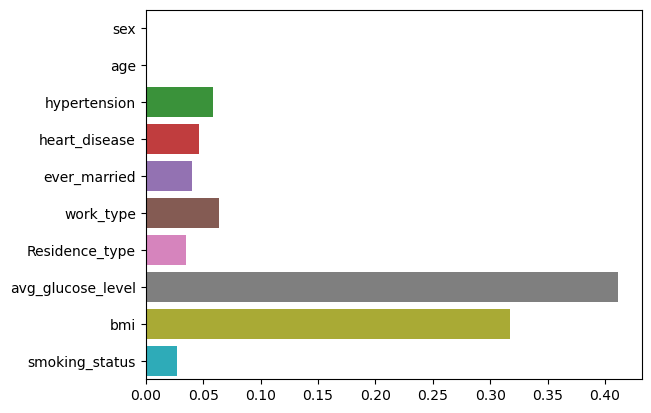

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x= dtc.feature_importances_, y=features.columns)
plt.show()

In [43]:
features.iloc[:,2]

0        0
1        0
2        0
3        1
4        0
        ..
37100    0
37101    0
37102    0
37103    0
37104    0
Name: hypertension, Length: 37105, dtype: int64

상위 두개의 feature만 뽑아내어 다시 graphviz 작업 진행

In [44]:
df1 = df.copy()

In [45]:
df1 = df1[['avg_glucose_level','bmi','stroke']]
df1

,avg_glucose_level,bmi,stroke
0,228.69,36.6,1
1,105.92,32.5,1
2,171.23,34.4,1
3,174.12,24.0,1
4,186.21,29.0,1
...,...,...,...
37100,120.94,29.7,0
37101,77.66,40.8,0
37102,231.95,33.2,0
37103,216.38,34.5,0


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

features, targets = df1.iloc[:, :-1], df1.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features,targets, test_size=0.2, random_state= 124)

dtc.fit(X_train.values, y_train.values)

DecisionTreeClassifier()

In [47]:
class_names = targets.unique().astype(str)
class_names

array(['1', '0'], dtype='<U21')

In [48]:
from sklearn.tree import export_graphviz

export_graphviz(
    dtc,
    out_file='./images/stroke_dtc02.dot',
    class_names=class_names,
    feature_names=features.columns,
    impurity = True, #불순도 표시
    filled = True # 그림에 색상을 채울것인가
)

In [49]:
import graphviz

with open('./images/stroke_dtc02.dot') as f:
    stroke_dtc02 = f.read()

stroke_dtc02_graph = graphviz.Source(stroke_dtc02)

In [50]:
stroke_dtc02_graph.render(filename='stroke_dtc02', directory='./images', format='png')

'images\\stroke_dtc02.png'

<img src='./images/stroke_dtc02.png'>

max_depth는 22, 최대 leaf는 4임을 확인하였다.  
sample수는 마지막 leaf 전에 100~ 130개 정도 되는 것을 확인.

decision tree로 accuracy_score확인

In [51]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, dtc.predict(X_test.values))

1.0

과적합 발생

In [52]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

GridSearchCV 진행

In [53]:
df

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
37100,1.0,38.0,0,0,0,4,1,120.94,29.7,1,0
37101,0.0,53.0,0,0,1,4,0,77.66,40.8,0,0
37102,1.0,32.0,0,0,1,2,0,231.95,33.2,0,0
37103,1.0,42.0,0,0,1,3,0,216.38,34.5,0,0


In [54]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

features, targets = df.iloc[:, :-1], df.iloc[:, -1]

# stratify: 데이터 분리 시 타겟 데이터의 분포 비율에 맞춰서 나눠준다.
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

dtc = DecisionTreeClassifier()
parameters = {'max_depth': [7, 8, 9, 10, 11, 12, 13, 14], 'min_samples_split': [100,110,120,130,140,150]}

g_dtc = GridSearchCV(dtc, param_grid=parameters, cv=10, refit=True, return_train_score=True)

# 교차 검증 진행
g_dtc.fit(X_train, y_train)

pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 7, 'min_samples_split': 100}",0.747137,44,0.753116,0.727518,0.740990
1,"{'max_depth': 7, 'min_samples_split': 110}",0.747171,43,0.753116,0.727518,0.740990
2,"{'max_depth': 7, 'min_samples_split': 120}",0.746194,45,0.752105,0.726170,0.739980
3,"{'max_depth': 7, 'min_samples_split': 130}",0.745385,46,0.752105,0.726170,0.739980
4,"{'max_depth': 7, 'min_samples_split': 140}",0.744981,47,0.752105,0.724486,0.739980
5,"{'max_depth': 7, 'min_samples_split': 150}",0.744981,47,0.752105,0.724486,0.739980
6,"{'max_depth': 8, 'min_samples_split': 100}",0.789550,37,0.794207,0.791849,0.782082
7,"{'max_depth': 8, 'min_samples_split': 110}",0.789415,38,0.794207,0.791849,0.782082
8,"{'max_depth': 8, 'min_samples_split': 120}",0.788000,39,0.791849,0.790502,0.779050
9,"{'max_depth': 8, 'min_samples_split': 130}",0.786619,40,0.791849,0.790502,0.779050


In [55]:
g_dtc.best_estimator_

DecisionTreeClassifier(max_depth=14, min_samples_split=100)

In [56]:
from sklearn.metrics import accuracy_score

dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)

print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 93.4241%


max_depth를 14를 기준으로 다시 확인

In [57]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

features, targets = df.iloc[:, :-1], df.iloc[:, -1]

# stratify: 데이터 분리 시 타겟 데이터의 분포 비율에 맞춰서 나눠준다.
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

dtc = DecisionTreeClassifier()
parameters = {'max_depth': [12, 13, 14, 15, 16], 'min_samples_split': [80,90,100,110,120,130]}

g_dtc = GridSearchCV(dtc, param_grid=parameters, cv=10, refit=True, return_train_score=True)

# 교차 검증 진행
g_dtc.fit(X_train, y_train)

pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 12, 'min_samples_split': 80}",0.887920,25,0.877063,0.881442,0.889862
1,"{'max_depth': 12, 'min_samples_split': 90}",0.887482,26,0.876726,0.880768,0.889862
2,"{'max_depth': 12, 'min_samples_split': 100}",0.885596,27,0.874705,0.879757,0.886831
3,"{'max_depth': 12, 'min_samples_split': 110}",0.885326,28,0.874705,0.879757,0.886157
4,"{'max_depth': 12, 'min_samples_split': 120}",0.883507,29,0.872348,0.878073,0.882452
5,"{'max_depth': 12, 'min_samples_split': 130}",0.880239,30,0.871000,0.877400,0.881105
6,"{'max_depth': 13, 'min_samples_split': 80}",0.906516,19,0.897609,0.902998,0.912765
7,"{'max_depth': 13, 'min_samples_split': 90}",0.905707,20,0.896598,0.901987,0.912765
8,"{'max_depth': 13, 'min_samples_split': 100}",0.903855,21,0.894577,0.900977,0.909734
9,"{'max_depth': 13, 'min_samples_split': 110}",0.903417,22,0.894577,0.900977,0.909060


In [58]:
g_dtc.best_estimator_

DecisionTreeClassifier(max_depth=16, min_samples_split=80)

In [59]:
from sklearn.metrics import accuracy_score

dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)

print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 96.4291%


과적합의 문제가 발생할지도 모른다고 판단하기에, min_sample_split을 120으로 조정

In [60]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

features, targets = df.iloc[:, :-1], df.iloc[:, -1]

# stratify: 데이터 분리 시 타겟 데이터의 분포 비율에 맞춰서 나눠준다.
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

dtc = DecisionTreeClassifier()
parameters = {'max_depth': [12, 13, 14], 'min_samples_split': [120,130]}

g_dtc = GridSearchCV(dtc, param_grid=parameters, cv=10, refit=True, return_train_score=True)

# 교차 검증 진행
g_dtc.fit(X_train, y_train)

pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 12, 'min_samples_split': 120}",0.883474,5,0.872348,0.878073,0.882452
1,"{'max_depth': 12, 'min_samples_split': 130}",0.880206,6,0.871000,0.877400,0.881105
2,"{'max_depth': 13, 'min_samples_split': 120}",0.899947,3,0.891883,0.897609,0.904008
3,"{'max_depth': 13, 'min_samples_split': 130}",0.896679,4,0.890536,0.896935,0.902661
4,"{'max_depth': 14, 'min_samples_split': 120}",0.917667,1,0.912765,0.915460,0.925227
5,"{'max_depth': 14, 'min_samples_split': 130}",0.914230,2,0.911418,0.914786,0.922196


In [61]:
g_dtc.best_estimator_

DecisionTreeClassifier(max_depth=14, min_samples_split=120)

In [62]:
from sklearn.metrics import accuracy_score

dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)

print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 93.0468%


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[3350  455]
 [  61 3555]]
정확도: 0.9305, 정밀도: 0.8865, 재현율: 0.9831, F1: 0.9323, ROC-AUC: 0.9318
################################################################################


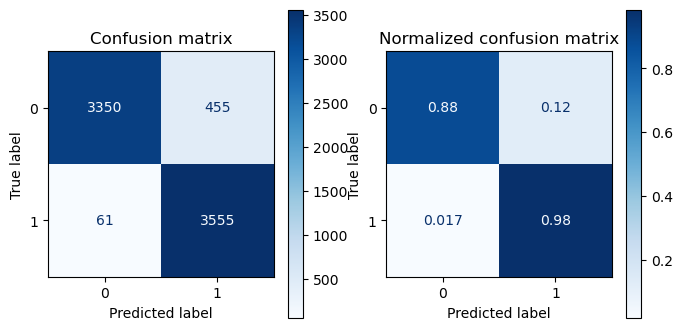

In [64]:
get_evaluation(y_test, prediction, dtc, X_test)

proba

In [65]:
proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

for proba, predict in zip(proba.tolist(), prediction.tolist()):
    print(proba, predict)

[0.2960618846694796, 0.7039381153305204] 1
[0.10297482837528604, 0.897025171624714] 1
[0.07218683651804671, 0.9278131634819533] 1
[1.0, 0.0] 0
[0.3180263800683928, 0.6819736199316072] 1
[1.0, 0.0] 0
[0.0, 1.0] 1
[1.0, 0.0] 0
[0.3180263800683928, 0.6819736199316072] 1
[0.0, 1.0] 1
[0.0, 1.0] 1
[0.0, 1.0] 1
[0.0, 1.0] 1
[0.0, 1.0] 1
[1.0, 0.0] 0
[1.0, 0.0] 0
[0.047619047619047616, 0.9523809523809523] 1
[0.23124042879019907, 0.7687595712098009] 1
[1.0, 0.0] 0
[0.3180263800683928, 0.6819736199316072] 1
[1.0, 0.0] 0
[1.0, 0.0] 0
[0.0, 1.0] 1
[1.0, 0.0] 0
[0.09271523178807947, 0.9072847682119205] 1
[0.056179775280898875, 0.9438202247191011] 1
[0.0, 1.0] 1
[1.0, 0.0] 0
[0.3180263800683928, 0.6819736199316072] 1
[0.0, 1.0] 1
[0.2960618846694796, 0.7039381153305204] 1
[1.0, 0.0] 0
[0.2960618846694796, 0.7039381153305204] 1
[1.0, 0.0] 0
[0.0, 1.0] 1
[1.0, 0.0] 0
[1.0, 0.0] 0
[1.0, 0.0] 0
[0.0, 1.0] 1
[1.0, 0.0] 0
[0.0, 1.0] 1
[0.8271604938271605, 0.1728395061728395] 0
[0.07550335570469799, 0.924

In [66]:
from sklearn.preprocessing import Binarizer

threshold = 0.5

proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

In [67]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[3350  455]
 [  61 3555]]
정확도: 0.9305, 정밀도: 0.8865, 재현율: 0.9831, F1: 0.9323, ROC-AUC: 0.9318
################################################################################


커스텀 임계값에 따른 오차행렬 함수

In [68]:
def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)

정밀도 재현율 수립을 위한 cuv 그래프 확인

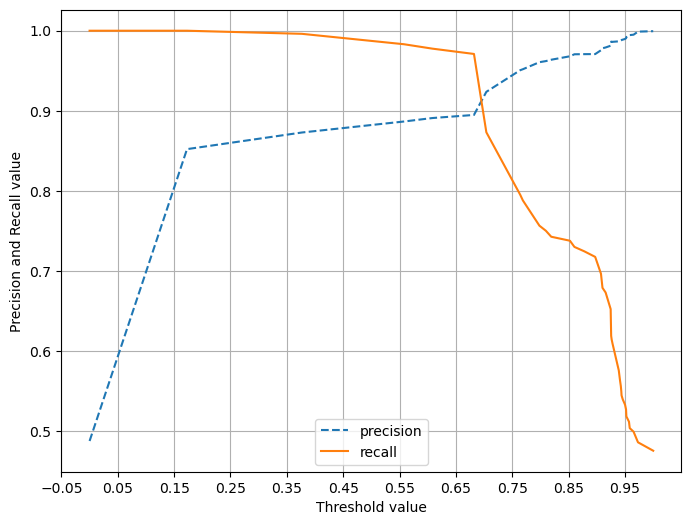

In [69]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))


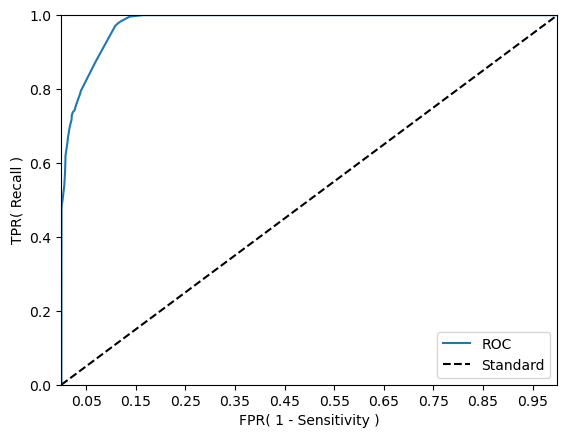

In [70]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

매우 예측이 뛰어남..

f1_score가 가장 높은 지점 표기한 그래프

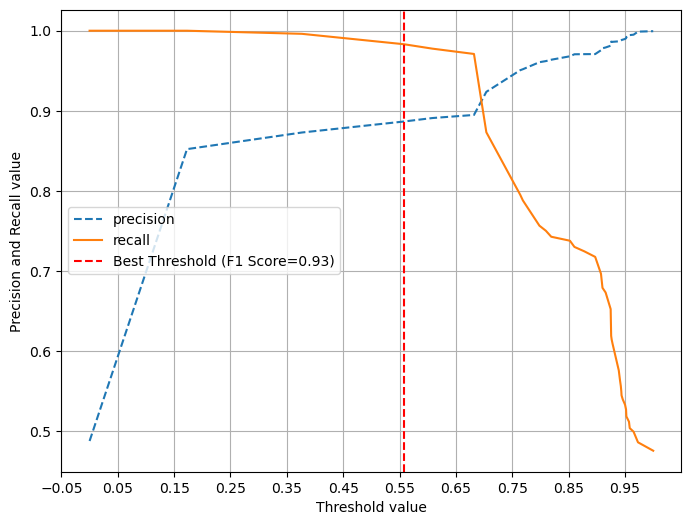

In [71]:
from sklearn.metrics import precision_recall_curve, f1_score

def precision_recall_curve_plot_with_f1(y_test, proba_class1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)

    # F1 score 계산
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

    # 최적의 임계값과 그때의 F1 score 찾기
    best_threshold = thresholds[np.argmax(f1_scores)]
    best_f1_score = np.max(f1_scores)

    # 그래프 그리기
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

    # F1 score에 해당하는 임계값 표시
    plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best Threshold (F1 Score={best_f1_score:.2f})')

    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot_with_f1(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))


In [72]:
from sklearn.metrics import accuracy_score

dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)

print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 93.0468%


### precision_recall_curve로 확인한 thresholds

In [73]:
proba_class1 = dtc.predict_proba(X_test)[:, 1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([0.        , 0.17283951, 0.37654321, 0.55757576, 0.60818713,
       0.68197362, 0.70393812, 0.76415094, 0.76875957, 0.79807692,
       0.80952381, 0.81904762, 0.85217391, 0.86021505, 0.87777778,
       0.89702517, 0.90728477, 0.91      , 0.91554054, 0.92449664,
       0.92537313, 0.92631579, 0.92781316, 0.93888889, 0.94117647,
       0.94252874, 0.94339623, 0.94382022, 0.94594595, 0.95      ,
       0.95180723, 0.95238095, 0.95698925, 0.95833333, 0.96511628,
       0.97297297, 1.        ])

In [74]:
get_evaluation_by_thresholds(y_test, proba_class1, thresholds)

0.0
오차 행렬
[[3177  628]
 [   0 3616]]
정확도: 0.9154, 정밀도: 0.8520, 재현율: 1.0000, F1: 0.9201, ROC-AUC: 0.9175
################################################################################
0.1728395061728395
오차 행렬
[[3280  525]
 [  14 3602]]
정확도: 0.9274, 정밀도: 0.8728, 재현율: 0.9961, F1: 0.9304, ROC-AUC: 0.9291
################################################################################
0.3765432098765432
오차 행렬
[[3350  455]
 [  61 3555]]
정확도: 0.9305, 정밀도: 0.8865, 재현율: 0.9831, F1: 0.9323, ROC-AUC: 0.9318
################################################################################
0.5575757575757576
오차 행렬
[[3372  433]
 [  81 3535]]
정확도: 0.9307, 정밀도: 0.8909, 재현율: 0.9776, F1: 0.9322, ROC-AUC: 0.9319
################################################################################
0.6081871345029239
오차 행렬
[[3392  413]
 [ 105 3511]]
정확도: 0.9302, 정밀도: 0.8948, 재현율: 0.9710, F1: 0.9313, ROC-AUC: 0.9312
################################################################################
0.6819736199316

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation_by_custom_proba(y_test, prediction, visualize=False):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if visualize:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_predictions(y_test, prediction, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[3350  455]
 [  61 3555]]
정확도: 0.9305, 정밀도: 0.8865, 재현율: 0.9831, F1: 0.9323, ROC-AUC: 0.9318
################################################################################


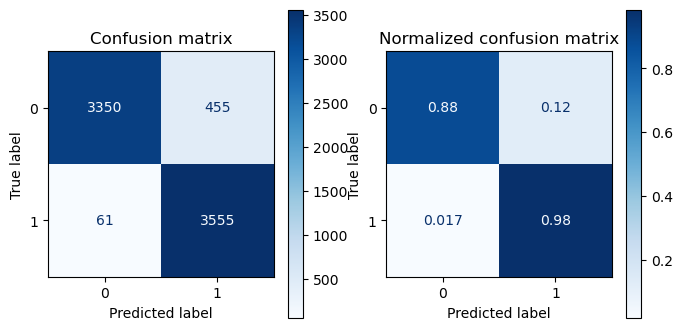

In [76]:
get_evaluation_by_custom_proba(y_test, prediction, visualize=True)

### roc_curve로 확인한 thresholds

In [77]:
_, _, thresholds = roc_curve(y_test,proba_class1)

In [78]:
get_evaluation_by_thresholds(y_test, proba_class1, thresholds)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2.0
오차 행렬
[[3805    0]
 [3616    0]]
정확도: 0.5127, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000, ROC-AUC: 0.5000
################################################################################
1.0
오차 행렬
[[3805    0]
 [3616    0]]
정확도: 0.5127, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000, ROC-AUC: 0.5000
################################################################################
0.972972972972973
오차 행렬
[[3804    1]
 [1898 1718]]
정확도: 0.7441, 정밀도: 0.9994, 재현율: 0.4751, F1: 0.6440, ROC-AUC: 0.7374
################################################################################
0.9651162790697675
오차 행렬
[[3803    2]
 [1860 1756]]
정확도: 0.7491, 정밀도: 0.9989, 재현율: 0.4856, F1: 0.6535, ROC-AUC: 0.7425
################################################################################
0.9583333333333334
오차 행렬
[[3796    9]
 [1812 1804]]
정확도: 0.7546, 정밀도: 0.9950, 재현율: 0.4989, F1: 0.6646, ROC-AUC: 0.7483
################################################################################
0.956989247311828
오차 행렬
[[3795 

### 🚩정밀도와 재현율에 대한 판단

뇌졸증인가 아닌가에 대하여 판단은 다음과 같이 할 수 있다.

- TP: 모델이 뇌졸증 환자를 뇌졸증 환자라고 판단.
- FP: 모델이 정상인을 뇌졸증 환자라고 판단.(error I)
- TN: 모델이 정상인을 정상인이라고 판단.
- FN: 모델이 뇌졸증 환자를 정상인이라고 판단. (error II)

- 정밀도 (Precision): 모델이 뇌졸증 환자라고 판단한 결과 중에서 실제 뇌졸증 환자의 수의 비율 (TP/TP+FP)
- 재현율 (Recall): 실제 뇌졸증 환자중에서 모델이 놓치지 않고 뇌졸증 환자라고 판단한 수의 비율 (TP/TP+FN)

🚩임계치를 높여서 정밀도를 높여주는 것이 적합하다고 판단했다.
- 왜냐하면, 실제 뇌졸증환자를 판단하지 못하여 정상환자라고 하는 것보다는,  
  기존의 정상인 환자에게 뇌졸증이라는 판단을 내려 그 판단을 받은 정상인으로 하여금 실제 뇌졸증 검사를 받도록하는 것이 더 좋다고 판단했기 때문이다.

#### 기존 threshold 0.5일때 

오차 행렬
[[3350  455]
 [  61 3555]]
정확도: 0.9305, 정밀도: 0.8865, 재현율: 0.9831, F1: 0.9323, ROC-AUC: 0.9318
################################################################################


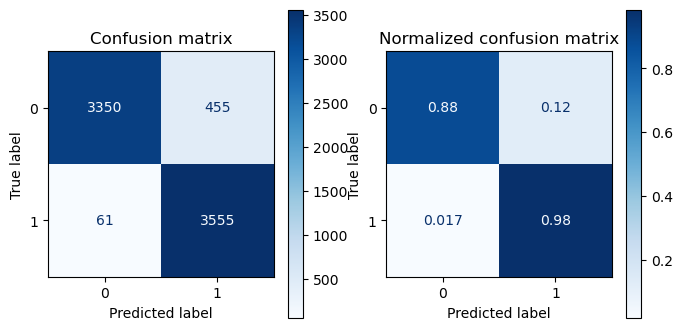

In [79]:
get_evaluation(y_test, prediction, dtc, X_test)

threshold를 위의 함수(roc_curve)로 찾아낸 임계치의 값으로 조정

<img src='./images/2.png'>

In [80]:
from sklearn.preprocessing import Binarizer

threshold = 0.7641509433962265

proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

오차 행렬
[[3661  144]
 [ 767 2849]]
정확도: 0.8772, 정밀도: 0.9519, 재현율: 0.7879, F1: 0.8622, ROC-AUC: 0.8750
################################################################################


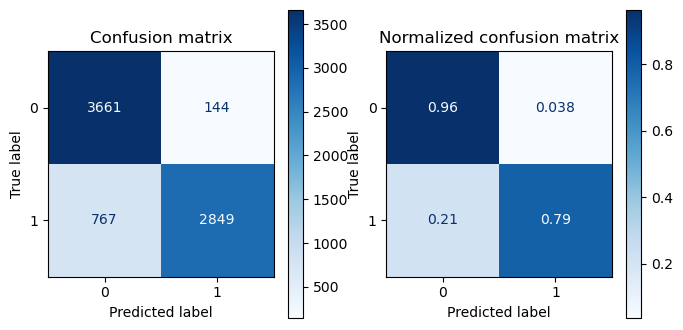

In [81]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation_by_custom_proba(y_test, custom_prediction, visualize=True)

정밀도가 높아지고, 재현율이 낮아진것을 확인할 수 있었다.

In [82]:
for proba, predict in zip(custom_proba.tolist(), custom_prediction.tolist()):
    print(proba, predict)

[0.7039381153305204] [0.0]
[0.897025171624714] [1.0]
[0.9278131634819533] [1.0]
[0.0] [0.0]
[0.6819736199316072] [0.0]
[0.0] [0.0]
[1.0] [1.0]
[0.0] [0.0]
[0.6819736199316072] [0.0]
[1.0] [1.0]
[1.0] [1.0]
[1.0] [1.0]
[1.0] [1.0]
[1.0] [1.0]
[0.0] [0.0]
[0.0] [0.0]
[0.9523809523809523] [1.0]
[0.7687595712098009] [1.0]
[0.0] [0.0]
[0.6819736199316072] [0.0]
[0.0] [0.0]
[0.0] [0.0]
[1.0] [1.0]
[0.0] [0.0]
[0.9072847682119205] [1.0]
[0.9438202247191011] [1.0]
[1.0] [1.0]
[0.0] [0.0]
[0.6819736199316072] [0.0]
[1.0] [1.0]
[0.7039381153305204] [0.0]
[0.0] [0.0]
[0.7039381153305204] [0.0]
[0.0] [0.0]
[1.0] [1.0]
[0.0] [0.0]
[0.0] [0.0]
[0.0] [0.0]
[1.0] [1.0]
[0.0] [0.0]
[1.0] [1.0]
[0.1728395061728395] [0.0]
[0.924496644295302] [1.0]
[0.0] [0.0]
[0.0] [0.0]
[0.0] [0.0]
[0.0] [0.0]
[1.0] [1.0]
[0.9459459459459459] [1.0]
[1.0] [1.0]
[0.0] [0.0]
[1.0] [1.0]
[0.1728395061728395] [0.0]
[1.0] [1.0]
[0.0] [0.0]
[0.0] [0.0]
[0.6081871345029239] [0.0]
[0.7687595712098009] [1.0]
[0.6819736199316072] 

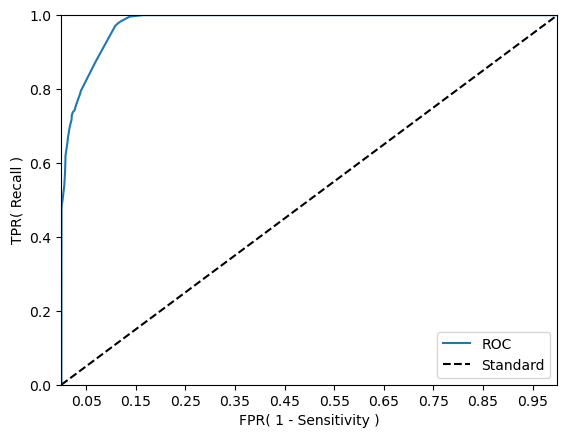

In [84]:
roc_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

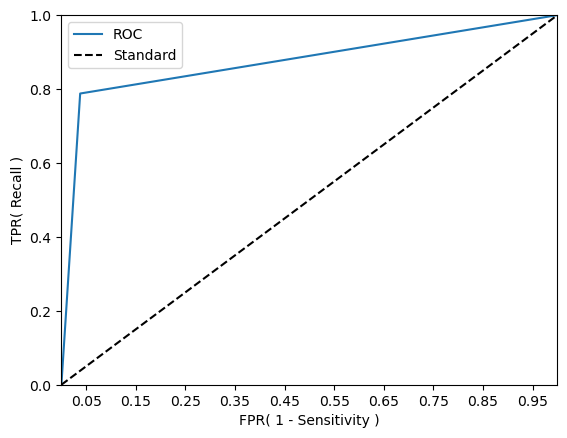

In [83]:
roc_curve_plot(y_test, custom_prediction)